---
title: "Your first map"
author: "Jungwoo Lee"
date: "2023-04-16"
categories: [code, Jupyter, python]
image: "numpy.png"
---

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/tools_numpy.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# Reading data

In [2]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 22.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd

Shapefile, GeoJSON, KML 및 GPKG와 같은 다양한 지리 공간 파일 형식이 있습니다. 우리는 이 마이크로 코스에서 그들의 차이점에 대해 논의하지 않을 것이지만, 다음을 언급하는 것이 중요합니다.

- Shapefile은 당신이 만나게 될 가장 일반적인 파일 유형이며,

- 이러한 모든 파일 유형은 gpd.read_file() 함수로 빠르게 로드할 수 있습니다.

다음 코드 셀은 [뉴욕 주 환경 보존부](https://www.dec.ny.gov/index.html)의 관리 하에 있는 숲, 야생 지역 및 기타 토지에 대한 정보가 포함된 셰이프 파일을 로드합니다.

In [4]:
# Read in the data
full_data = gpd.read_file("/Users/jungwoolee/Downloads/archive/DEC_lands/DEC_lands/DEC_lands.shp")

# View the first five rows of the data
full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,NaN,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,NaN,NaN,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,NaN,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


`CLASS` 열에서 볼 수 있듯이, 처음 다섯 행은 각각 다른 숲에 해당합니다.   

이 튜토리얼의 나머지 부분에서는, 이 데이터를 사용하여 주말 캠핑 여행을 계획하고 싶은 시나리오를 고려해 보세요. 온라인에서 크라우드 소싱 리뷰에 의존하는 대신, 당신은 당신만의 지도를 만들기로 결정했습니다. 이렇게 하면, 당신은 당신의 특정한 관심사에 맞게 여행을 조정할 수 있습니다.

# Prerequisites

데이터의 처음 다섯 행을 보기 위해, 우리는 head() 메소드를 사용했다. 당신은 이것이 또한 우리가 Pandas DataFrame을 미리 보는 데 사용하는 것이라는 것을 기억할 것입니다. 사실, DataFrame과 함께 사용할 수 있는 모든 명령은 데이터와 함께 작동합니다!

이것은 데이터가 (Pandas) DataFrame의 모든 기능을 가진 (GeoPandas) GeoDataFrame 객체에 로드되었기 때문입니다.

In [6]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

예를 들어, 모든 열을 사용할 계획이 없다면, 그 중 일부의 하위 집합을 선택할 수 있습니다. (데이터를 선택하는 다른 방법을 검토하려면, 팬더 마이크로 코스에서 이 [튜토리얼](https://www.kaggle.com/code/residentmario/indexing-selecting-assigning/tutorial)을 확인하세요.)

In [7]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

In [9]:
data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

또한 loc(및 iloc)과 isin을 사용하여 데이터의 하위 집합을 선택할 수 있습니다. (이것을 검토하려면, 팬더 마이크로 코스에서 이 [튜토리얼](https://www.kaggle.com/code/residentmario/indexing-selecting-assigning/tutorial)을 확인하세요.)

In [10]:
# Select lands that fall under the "WILD FOREST" or "WILDERNESS" category
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


위의 명령에 익숙하지 않다면, 참조를 위해 이 페이지를 북마크하는 것이 좋습니다. 필요에 따라 명령을 찾을 수 있습니다. (대안으로, 당신은 [팬더 마이크로](https://www.kaggle.com/learn/pandas) 코스를 수강할 수 있습니다.) 우리는 지도를 만들기 전에 데이터를 이해하고 필터링하기 위해 이 마이크로 코스 전반에 걸쳐 이러한 명령을 사용할 것입니다.

# Create your first map!

우리는 `plot()` 메소드로 데이터를 빠르게 시각화할 수 있습니다.

<AxesSubplot:>

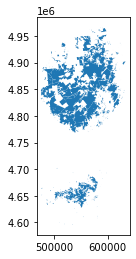

In [13]:
wild_lands.plot()

모든 GeoDataFrame에는 특별한 "기하학" 열이 포함되어 있습니다. 그것은 우리가 plot() 메소드를 호출할 때 표시되는 모든 기하학적 객체를 포함한다.

In [14]:
# View the first five entries in the "geometry" column
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

우리 데이터 세트의 "기하학" 열에는 위의 플롯에서 각각 다른 모양에 해당하는 2983개의 다른 다각형 객체가 포함되어 있습니다.

아래 코드 셀에서, 우리는 캠프장 위치(포인트), 발길(라인스트링) 및 카운티 경계(폴리곤)를 포함하는 세 개의 지오데이터프레임을 더 만듭니다.

In [15]:
# Campsites in New York state (Point)
POI_data = gpd.read_file("/Users/jungwoolee/Downloads/archive/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# Foot trails in New York state (LineString)
roads_trails = gpd.read_file("/Users/jungwoolee/Downloads/archive/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("/Users/jungwoolee/Downloads/archive/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

다음으로, 우리는 네 개의 GeoDataFrames 모두에서 지도를 만듭니다.

Plot() 메서드는 모양을 사용자 정의하는 데 사용할 수 있는 여러 매개 변수를 (선택 사항) 입력합니다. 가장 중요한 것은, 도끼 값을 설정하면 모든 정보가 동일한 지도에 그려진다는 것이다.

<AxesSubplot:>

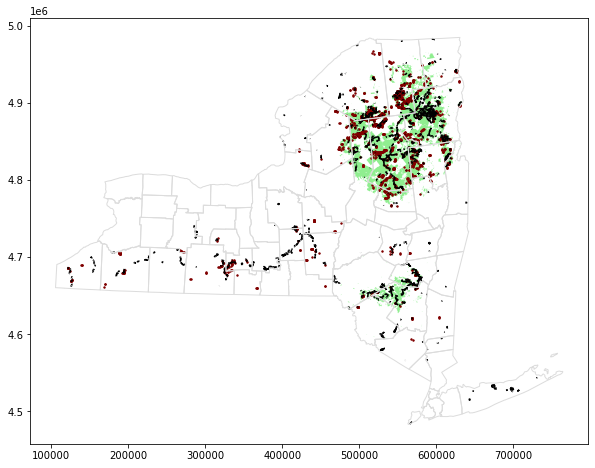

In [16]:
# Define a base map with county boundaries
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='maroon', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax)

주의 북동부는 캠핑 여행을 위한 좋은 선택이 될 것 같아!